# Brazillian E-commerce dataset (order_payments)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
data = pd.read_csv("olist_order_payments_dataset.csv")
data.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


## data column description
order_id: A unique identity for each and every order being created.  
payment_sequential: describes number of sequence of payment methods done at any order as customers may pay with more than one payment method.    
payment_type: The mode of payment choosen by customer.  
payment_installments: The number of installments choosen by customer.  
payment_value: The transaction value.

In [4]:
data.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [5]:
data.info() #order_id and payment_type are of type object. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [6]:
data.isnull().sum() #no null values till now

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

handling categorical data

out of both object type features, order_id makes no contribution and all values are also unique, thus it must be dropped during feature engineering 

In [7]:
data['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

note that payment_type consist of not_defined that means it is nan type of value

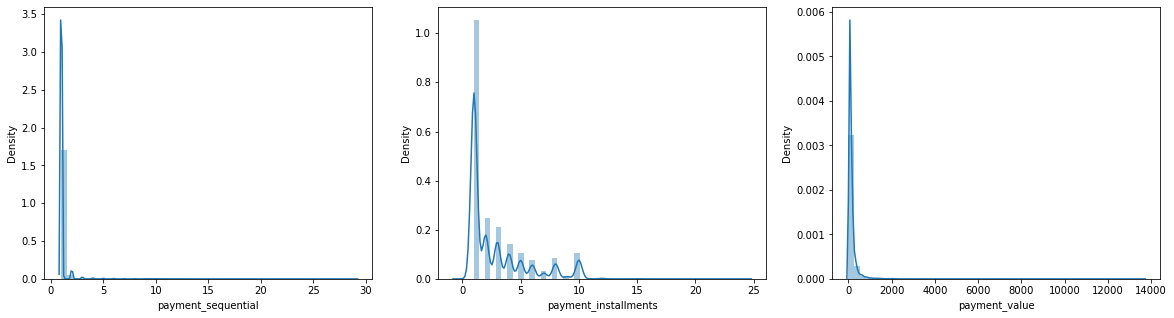

In [34]:
data_num = ['payment_sequential','payment_installments','payment_value']
figure = plt.figure(figsize=(20,5))
itr=1
for i in data_num:
    plt.subplot(1,3,itr)
    sns.distplot(data[i])
    itr+=1
plt.show()

In [15]:
pd.DataFrame(data['payment_sequential'].value_counts()).head(10)

,payment_sequential
1,99360
2,3039
3,581
4,278
5,170
6,118
7,82
8,54
9,43
10,34


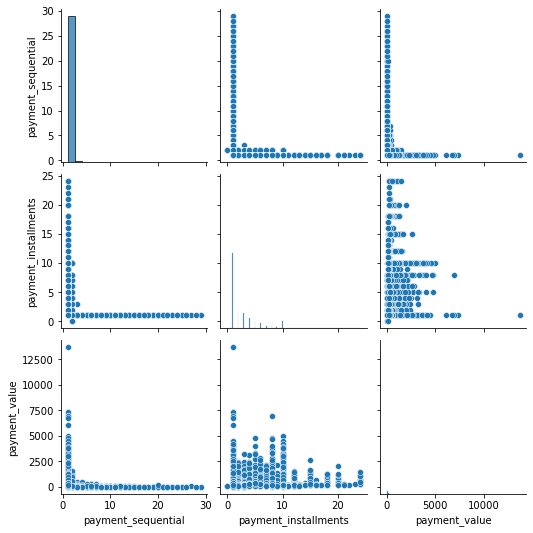

In [10]:
sns.pairplot(data)

### correlation between features

<AxesSubplot:>

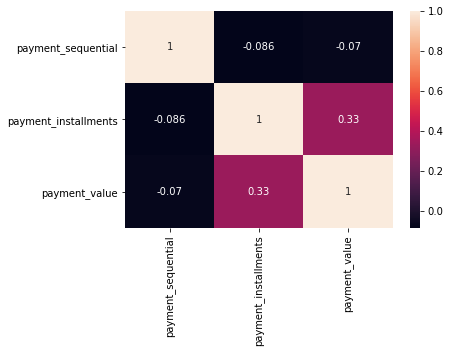

In [11]:
sns.heatmap(data.corr(),annot=True)